# Lending Club Case Study

In [940]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [941]:
#Read the data from the CSV file
loan_data = pd.read_csv("loan.csv")

In [942]:
#See the shape, info and data type of loan data
print(loan_data.shape)
print(loan_data.info())
print(loan_data.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### Observations:
1. There are totally 111 columns in the dataset
2. The dataset is huge with a memory of 33.6 + MB
3. The datatypes have mixed values

#### There are totally 111 columns which is a lot to analyze. Let's see if all that data makes sense to our analysis.

In [943]:
#Display the first 5 rows
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### There are a lot of columns not useful for our analysis. Lets drop them.

## 1. Data Cleaning and handling

In [944]:
#Check the total no. of rows and columns with NULL values
print("No. of empty rows in the data set:")
print(loan_data.isnull().all(axis = 1).sum())

print("No. of empty columns in the data set:")
print(loan_data.isnull().all(axis = 0 ).sum())

No. of empty rows in the data set:
0
No. of empty columns in the data set:
54


#### We see that no rows are empty but about 54 columns are empty. We can drop the same.

###  a) Dropping the columns with only NULL values

In [945]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.shape)

(39717, 57)


#### Now the number of columns have dropped from 111 to 57

### b) Dropping customer behavior variables 
-  Customer behavior variables are not available at the time of loan application, and thus they cannot help in our predictive analysis

In [946]:
loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type' ],axis = 1, inplace = True)

In [947]:
# Check the shape now
print(loan_data.shape)

(39717, 36)


#### Now the number of columns have dropped from 57 to 36

In [948]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,f,Jun-16,0.0,1,0,0.0,0,0.0,0.0


In [949]:
#Check the names of columns 
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'initial_list_status', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

### c) Dropping additional columns as they don't offer much to our analysis

In [950]:
loan_data.drop(['id', 'member_id', 'emp_title', 'mths_since_last_delinq', 'mths_since_last_record', 'initial_list_status', 'next_pymnt_d','url', 'desc', 'zip_code', 'title', 'tax_liens','delinq_amnt','chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'policy_code', 'pymnt_plan','acc_now_delinq', 'pub_rec_bankruptcies' ],axis = 1, inplace = True)

In [951]:
loan_data.shape

(39717, 17)

#### Now the number of columns have dropped from 36 to 17

In [952]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

### d) Check for Missing values in the remaining columns

In [953]:
# Check for any missing values
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

#### emp_length field has 1075 missing values

In [954]:
#Check the occurence of unique value
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### e) The missing values will be replaced by the mode. The missing values are less in number so imputing with mode does not affect our analysis

In [955]:
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

In [956]:
# Replace the missing values with mode
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)

#Check if any values are missing still
loan_data.emp_length.isnull().sum()

0

### f) Formatting columns - Standardize the data
 -  Let's format employment length (emp_length) field to contain only numbers
 -  Let's remove % from interest rate(int_rate) field to contain only numbers

In [957]:
#Convert to a numerical column
loan_data['emp_length']=loan_data.emp_length.str.extract('(\d+)')

In [958]:
#Display the emp_length column
loan_data['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [959]:
#Convert to a numerical column
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')

In [960]:
#Display the data
loan_data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

### g) Removing the current loan status data from the analysis as they cannot be used to predict the defaulters

In [961]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [962]:
loan_data.emp_length

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object

In [963]:
loan_data.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
count,38577.000000,38577.000000,38577.000000,38577,38577,38577.000000,38577,38577,38577,38577,3.857700e+04,38577,38577,38577,38577,38577,38577.000000
unique,NaN,NaN,NaN,2,370,NaN,7,35,10,5,NaN,3,55,2,14,50,NaN
top,NaN,NaN,NaN,36 months,10.99,NaN,B,A4,10,RENT,NaN,Not Verified,Nov-11,Fully Paid,debt_consolidation,CA,NaN
freq,NaN,NaN,NaN,29096,913,NaN,11675,2873,9521,18480,NaN,16694,2062,32950,18055,6949,NaN
mean,11047.025430,10784.058506,10222.481123,NaN,NaN,322.466318,NaN,NaN,NaN,NaN,6.877797e+04,NaN,NaN,NaN,NaN,NaN,13.272727
std,7348.441646,7090.306027,7022.720644,NaN,NaN,208.639215,NaN,NaN,NaN,NaN,6.421868e+04,NaN,NaN,NaN,NaN,NaN,6.673044
min,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5300.000000,5200.000000,5000.000000,NaN,NaN,165.740000,NaN,NaN,NaN,NaN,4.000000e+04,NaN,NaN,NaN,NaN,NaN,8.130000
50%,9600.000000,9550.000000,8733.440000,NaN,NaN,277.860000,NaN,NaN,NaN,NaN,5.886800e+04,NaN,NaN,NaN,NaN,NaN,13.370000
75%,15000.000000,15000.000000,14000.000000,NaN,NaN,425.550000,NaN,NaN,NaN,NaN,8.200000e+04,NaN,NaN,NaN,NaN,NaN,18.560000


In [964]:
loan_data.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

### h) Converting the datatypes of variables

In [965]:
loan_data['int_rate'] = loan_data['int_rate'].astype('float64')

### i) Deriving columns

In [966]:
# Derived columns

# categorise loan amounts into bins
loan_data['loan_amnt_category'] = pd.cut(loan_data ['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into bins
loan_data['annual_inc_category'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into bins
loan_data['int_rate_category'] = pd.cut(loan_data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into bins
loan_data['dti_category'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [967]:
# Derived columns

# Lets create month and year columns separately

loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['year']=loan_data['issue_d'].dt.year
loan_data['month']=loan_data['issue_d'].dt.month

### j) Handling outliers

### Variables which could possibly have outliers are:
-  annual_inc
-  dti
-  loan_amnt
-  funded_amnt
-  funded_amnt_inv

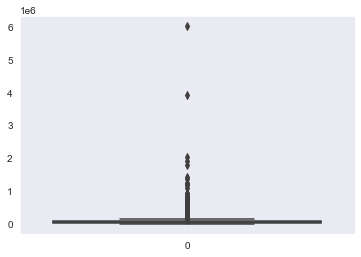

In [968]:
#Plot boxplot for annual_inc variable
sns.boxplot(loan_data['annual_inc'])
plt.show()

#### The plot doesn't give much information. But clearly shows the presence of outliers

In [969]:
#Lets print quartile information
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
print(quantile_info)

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64


#### Values above 95th percentile can be considered as outliers. They don't offer much to the analysis

In [970]:
_95_percentile = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= _95_percentile]

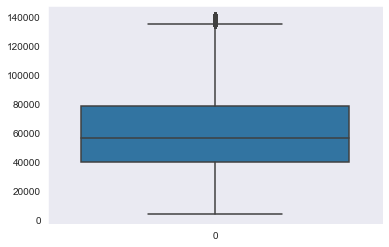

In [971]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

#### The outliers in the annual_inc is almost removed as seen in the plot above

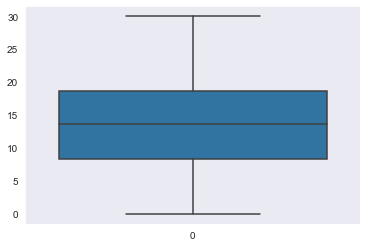

In [972]:
#Plot boxplot for dti variable
sns.boxplot(loan_data['dti'])
plt.show()

#### There are no outliers for dti variable

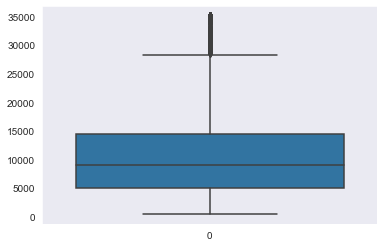

In [973]:
#Plot boxplot for funded_amnt variable
sns.boxplot(loan_data['funded_amnt'])
plt.show()

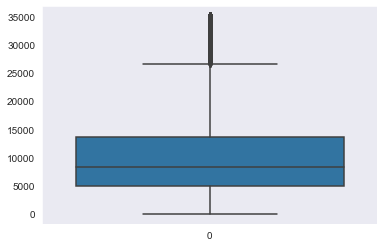

In [974]:
#Plot boxplot for funded_amnt_inv variable
sns.boxplot(loan_data['funded_amnt_inv'])
plt.show()

#### There are some values far from distribution. But the distribution is continous and there is no need to remove outliers.

## 2. Univariate Analysis

### a) Distribution plot on loan amounts

In [976]:
#### There are no outliers for dti variable

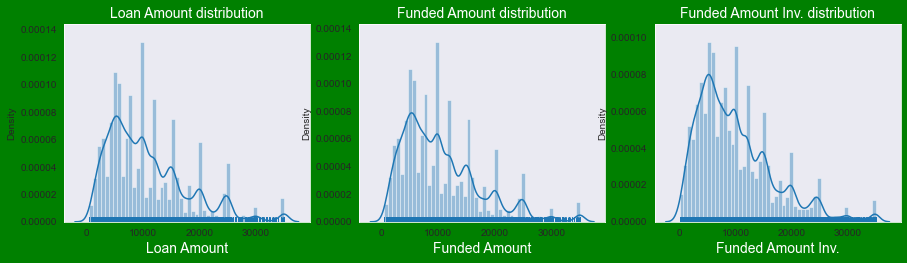

In [977]:
# Lets see distribution of three loan amount fields using distribution plot.

plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount distribution',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_data['funded_amnt'],rug = True)
ax.set_title('Funded Amount distribution',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_data['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. distribution',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

#### Observation:  Distribution of amounts for all three looks very much similar. We can use any one variable for our analysis further.

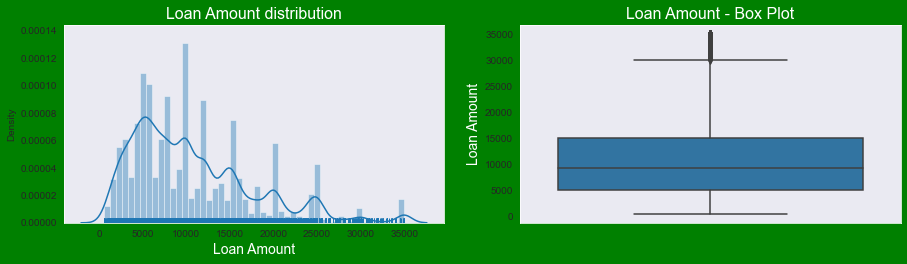

In [978]:
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount distribution',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

#### Observation:  Most of the Loan amounts are in range of 5000 - 15000

### b) Distribution plot on interest rates

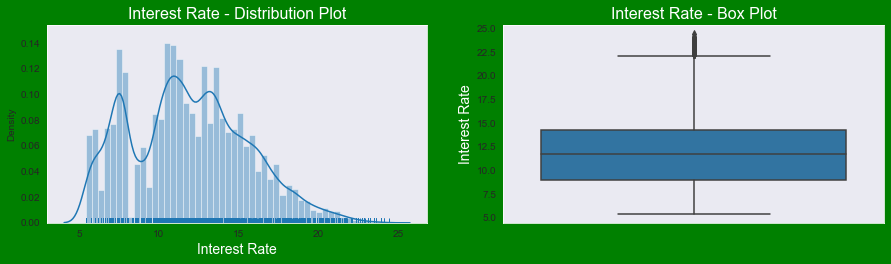

In [979]:
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

#### Observation:  Most interest rates are in range of 10% - 15%

### c) Distribution plot on annual income

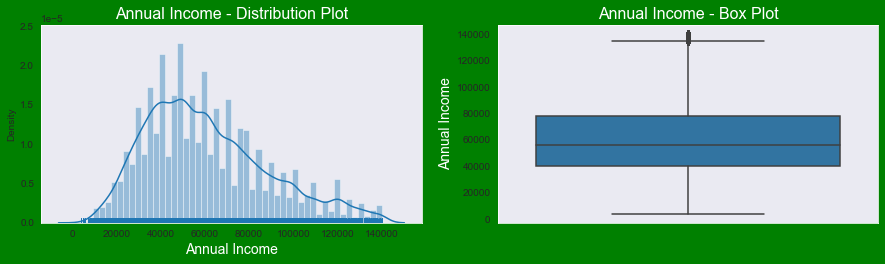

In [980]:
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_data['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

#### Observation:  Annual income of the borrowers are mostly in the range of 40000 - 80000

### d) Count plot on loan status

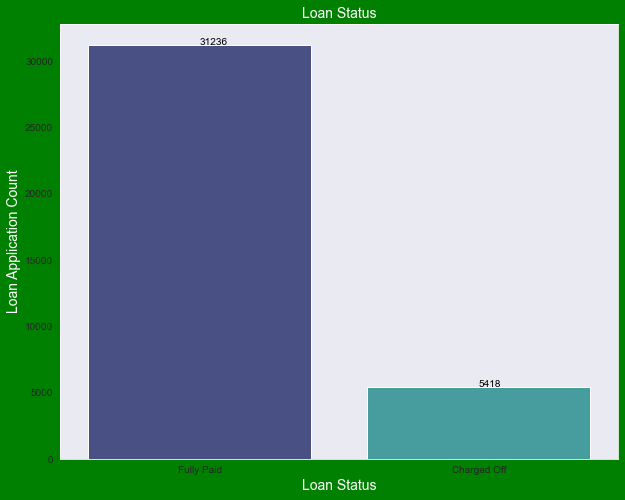

In [981]:
plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("dark")

ax = sns.countplot(x="loan_status",data=loan_data,palette='mako')

ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# To show count of values above bars
s = loan_data['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')


#### Observation: Close to 15% loans were charged off out of total loan issued.

### e) Count plot on loan purpose

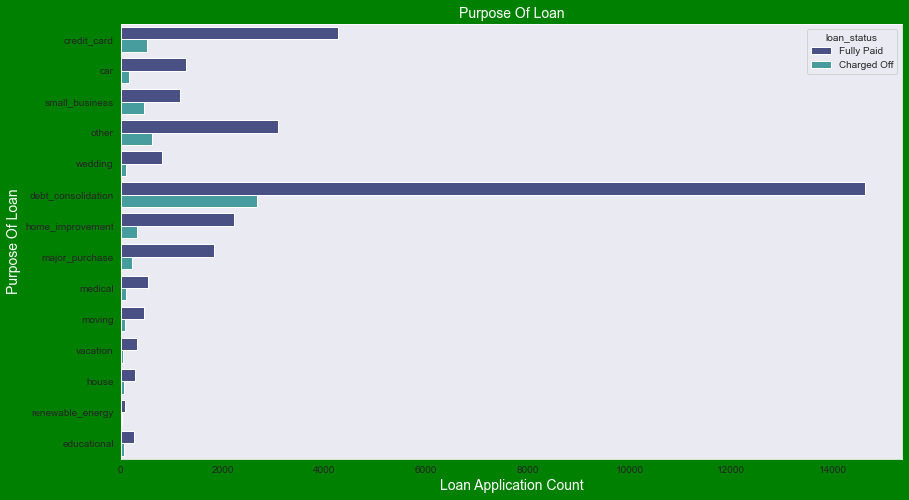

In [982]:
plt.figure(figsize=(14,8),facecolor='g')
sns.set_style("dark")

ax = sns.countplot(y="purpose",data=loan_data,hue='loan_status',palette='mako')

ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#### Observation: Most loans were taken for debt consolidation and credit card bill payment. Also the charged off loans are high for these type of loans.

### e) Count plot on home ownership

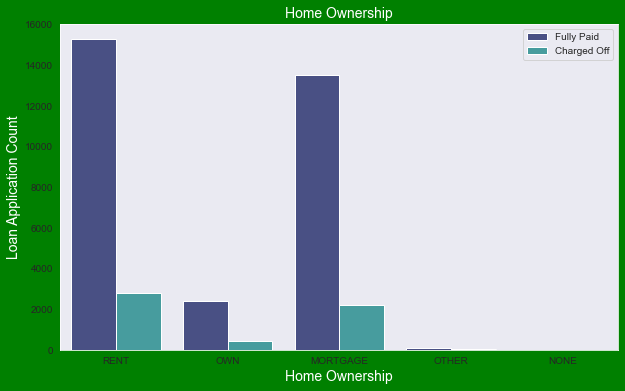

In [983]:
plt.figure(figsize=(10,6),facecolor='g')

ax = sns.countplot(x="home_ownership",data=loan_data,hue='loan_status',palette='mako')

ax.legend(bbox_to_anchor=(1, 1))

ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

#### Observation: Most loans were taken from people who are living on rent or mortgaged their home

### f) Bar plot on year and month

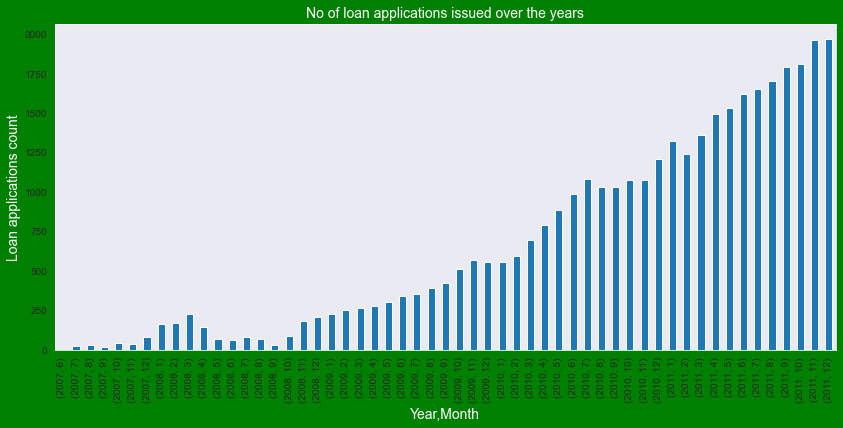

In [984]:
plt.figure(figsize=(14,6),facecolor='g')
loan_data.groupby(['year', 'month']).size().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

#### Observation: 
1. No of loan applications are increasing year on year
2. Increase in no. of loans are adding to the number of charged off loans
3. No. of loans reduced in year 2008 (may be due to great recession)

### g) Count plot on loan paying term

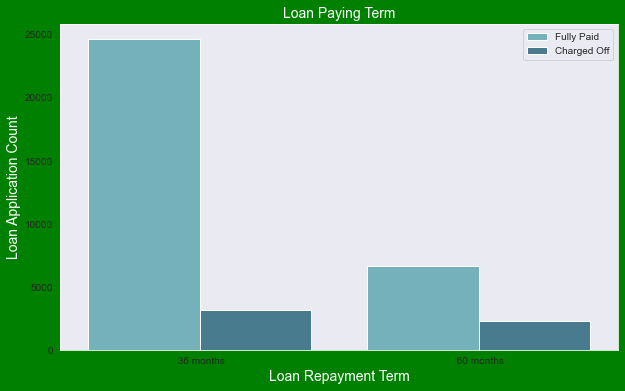

In [985]:
plt.figure(figsize=(10,6),facecolor='g')

ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### Applicants getting charged off are more in number who have taken 60 month tenure than 36. 

## 2. Bivariate Analysis

### a) Annual income vs charged_off_proportion

In [986]:
inc_range_vs_loan = loan_data.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000 +,914,7158,8072,0.113231


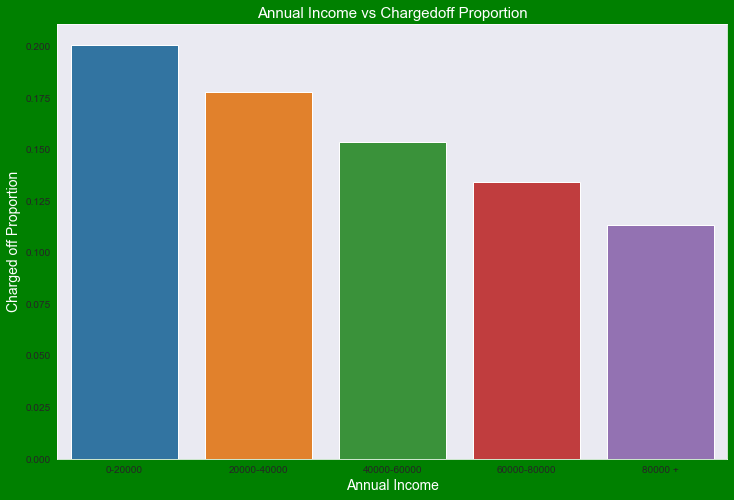

In [987]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')

ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')

ax1=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_range_vs_loan)

ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')

plt.show()

### Observation:
1. Income range of 80000+ are less likely to default
2. Income range of 0 - 20000 are more likely to default
3. Increase in annual income results in charged off proportion decreasing. High income bracket customers are less likely to default

### b) Purpose of loan vs charged_off_proportion

In [988]:
purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,454,1169,1623,0.279729
10,renewable_energy,18,77,95,0.189474
3,educational,54,258,312,0.173077
8,moving,90,460,550,0.163636
9,other,605,3094,3699,0.163558
5,house,55,283,338,0.162722
7,medical,104,537,641,0.162246
2,debt_consolidation,2677,14628,17305,0.154695
12,vacation,52,313,365,0.142466
4,home_improvement,322,2234,2556,0.125978


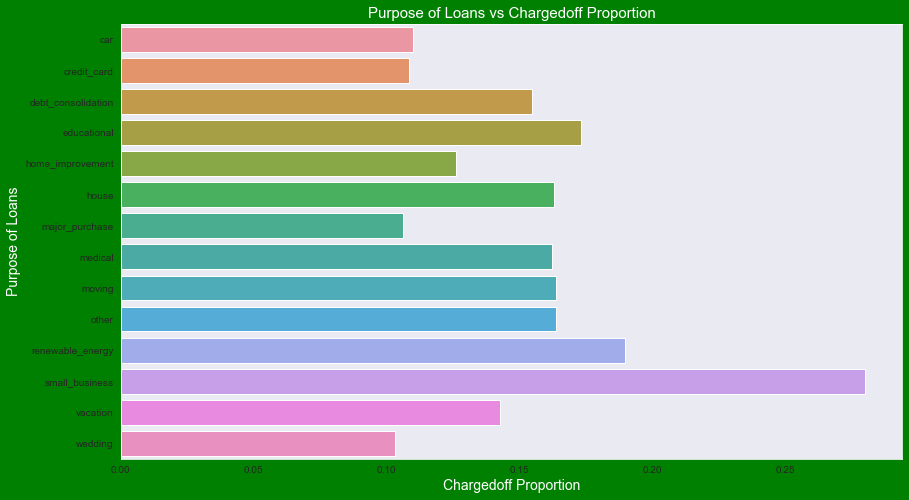

In [989]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')

ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')

ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)

ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')

plt.show()

### Observation:
1. Small business folks are more likely to default


### c) Grade vs charged_off_proportion

In [990]:
grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,95,166,261,0.363985
5,F,289,597,886,0.326185
4,E,660,1788,2448,0.269608
3,D,1080,3755,4835,0.223371
2,C,1325,6156,7481,0.177115
1,B,1376,9721,11097,0.123997
0,A,593,9053,9646,0.061476


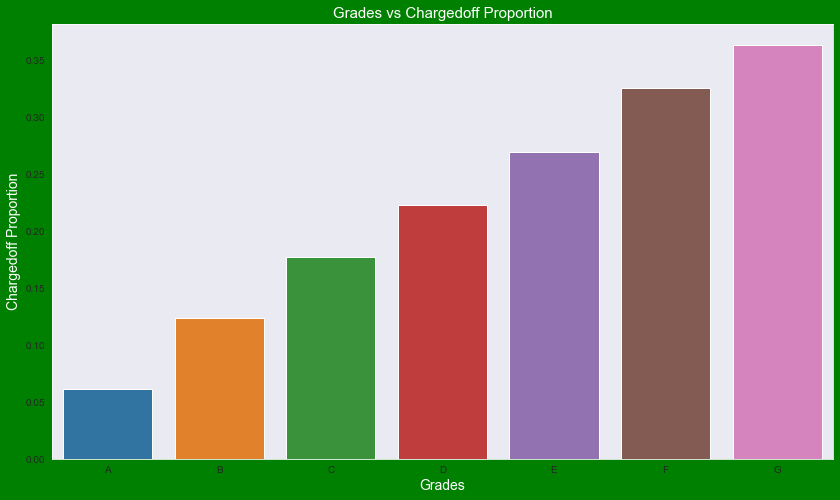

In [991]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')

ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')

ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)

ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')

plt.show()

### Observation:
1. Grade 'A' are very low on defaulter proportion
2. Grade 'F' and 'G' are high on defaulter proportion
3. Defaulter proportion is increasing with increasing grades 


### d) Sub-Grade vs charged_off_proportion

In [992]:
grade_vs_loan = loan_data.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,50,48,98,0.510204
32,G3,19,21,40,0.475000
34,G5,9,13,22,0.409091
31,G2,26,40,66,0.393939
30,G1,30,58,88,0.340909
28,F4,46,93,139,0.330935
26,F2,67,150,217,0.308756
23,E4,117,275,392,0.298469
27,F3,46,110,156,0.294872
25,F1,80,196,276,0.289855


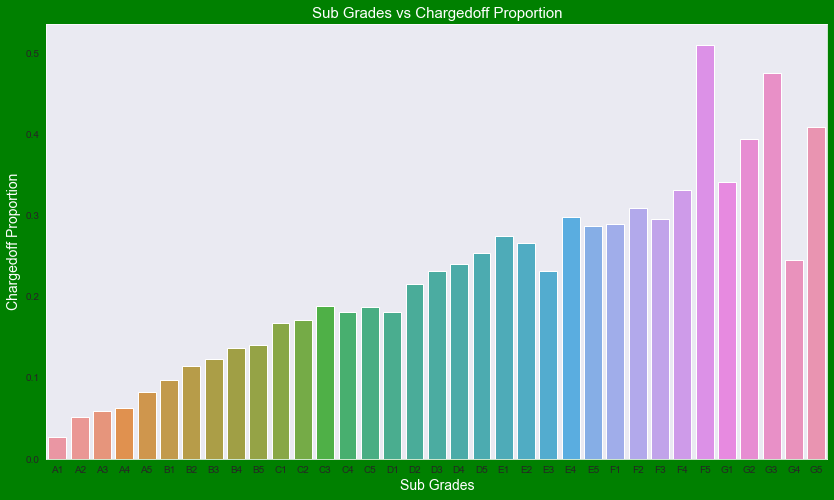

In [993]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='g')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

### Observation:
1. Sub Grades of "A" are very less likely to charged off.
2. Sub Grades of "F" and "G" are more likely to charged off.
3. Defaulter proportion is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"


### e) Interest rate vs charged_off_proportion

In [994]:
interest_vs_loan = loan_data.groupby(['int_rate_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1192,3131,4323,0.275734
2,12.5-16,1951,8978,10929,0.178516
1,10-13,1195,7710,8905,0.134194
0,0-10,812,11012,11824,0.068674


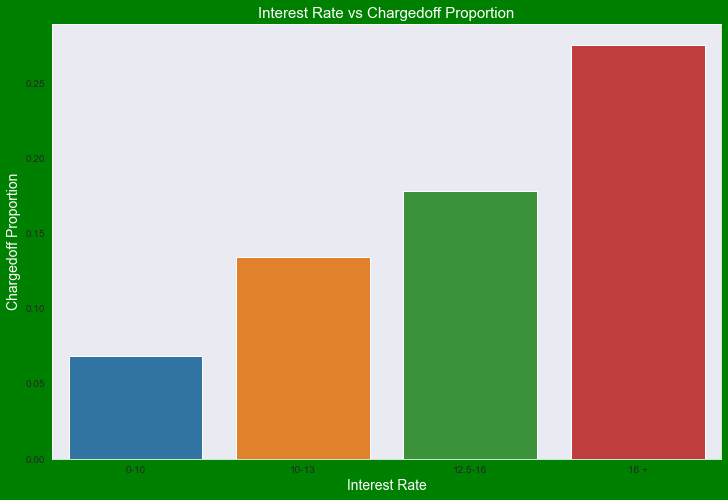

In [995]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')

ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')

ax1=sns.barplot(x='int_rate_category', y='Chargedoff_Proportion', data=interest_vs_loan)

ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

plt.show()

### Observation:
1. Interest rates more than 16% are more likely to default
2. Interest rates less than 10% are less likely to default
3. Defaulter proportion is increasing with higher interest rates


### f) Employment length vs charged_off_proportion

In [996]:
emplen_vs_loan = loan_data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,10,1495,7407,8902,0.167940
7,7,252,1392,1644,0.153285
5,5,441,2603,3044,0.144875
0,1,1066,6304,7370,0.144640
8,8,194,1149,1343,0.144453
6,6,294,1779,2073,0.141823
3,3,536,3288,3824,0.140167
4,4,443,2757,3200,0.138437
2,2,547,3554,4101,0.133382
9,9,150,1003,1153,0.130095


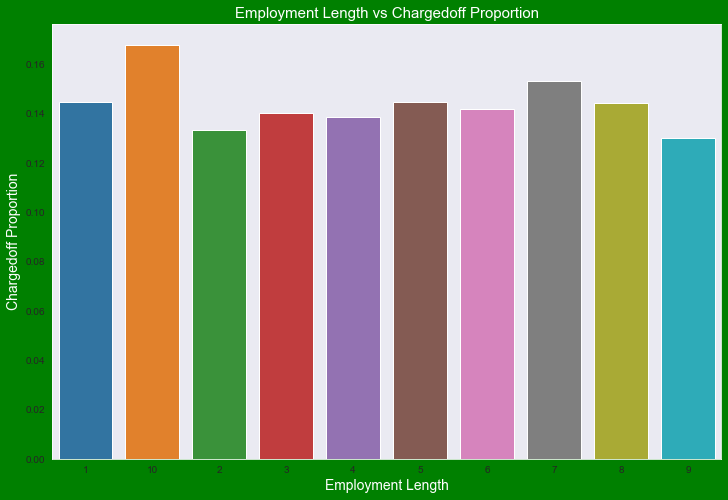

In [997]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')

ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')

ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)

ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

plt.show()

### Observation:
1. Applicants who are not working or having less than one year of experience are more likely to default (No source of income increases the chance of default)

### g) Address state vs charged_off_proportion

In [998]:
state_vs_loan = loan_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,103.0,354.0,457.0,0.225383
13,ID,1.0,4.0,5.0,0.200000
40,SD,12.0,50.0,62.0,0.193548
0,AK,13.0,58.0,71.0,0.183099
9,FL,485.0,2167.0,2652.0,0.182881
11,HI,28.0,132.0,160.0,0.175000
24,MO,111.0,536.0,647.0,0.171561
31,NM,30.0,147.0,177.0,0.169492
36,OR,70.0,358.0,428.0,0.163551


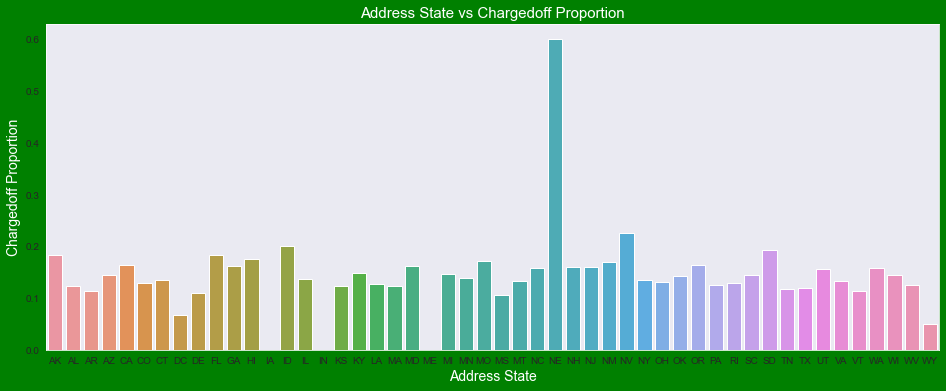

In [999]:
fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='g')

ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')

ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)

ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

plt.show()

### Observation:
1.State 'NE' is showing high chances of default

### h) Verification status vs charged_off_proportion

In [1000]:
verfy_vs_loan = loan_data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1949,9270,11219,0.173723
1,Source Verified,1373,7782,9155,0.149973
0,Not Verified,2096,14184,16280,0.128747


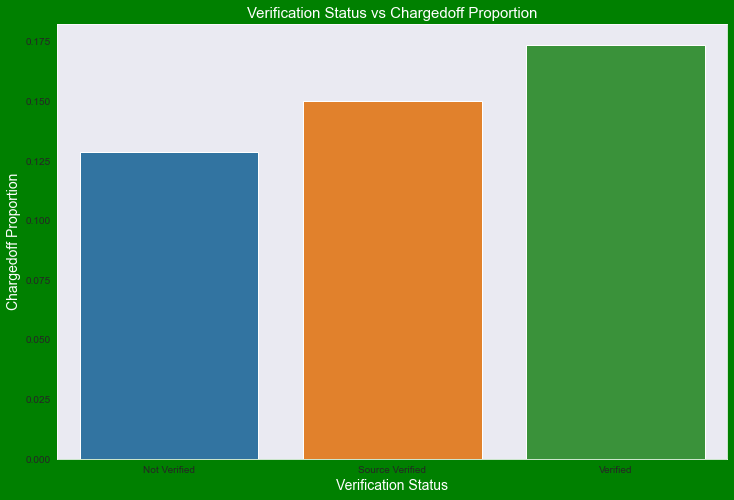

In [1001]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

### Observation:
1. The differnce in charged off proportion is very less
2. This variable doesn't provide a significant difference in making a decision

### i) Term of loan vs Interest rate

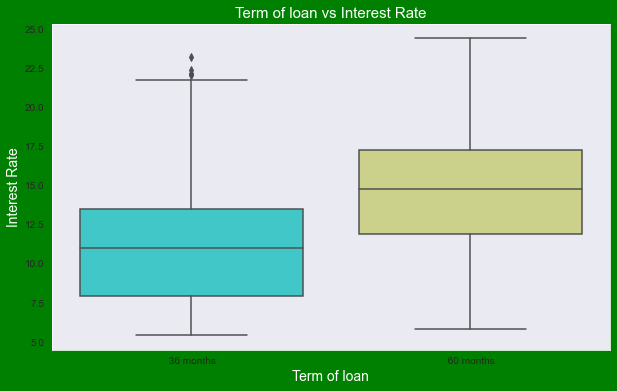

In [1002]:
plt.figure(figsize=(10,6),facecolor='g')
ax = sns.boxplot(y='int_rate', x='term', data =loan_data,palette='rainbow')

ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')

ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')

plt.show()

### Observation:
1. Average interest rate is higher for 60 months
2. Most of the loans issued for longer term had higher interest rates for repayment.

### j) Grade vs Interest rate

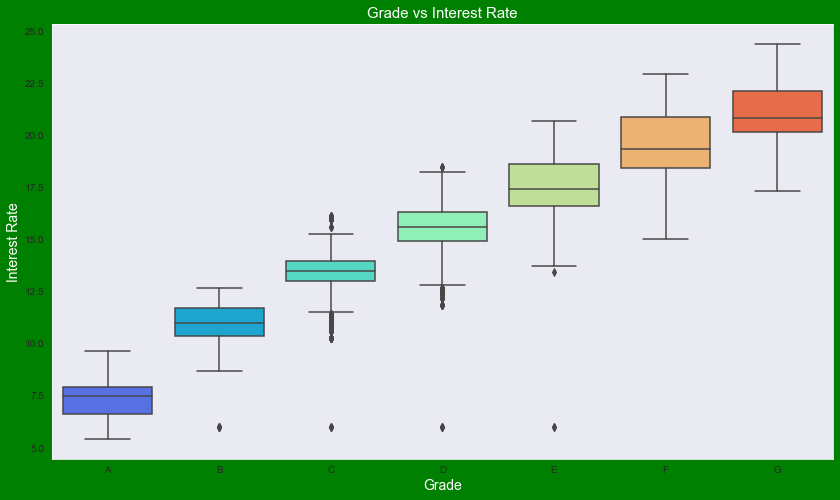

In [1003]:
plt.figure(figsize=(14,8),facecolor='g')

ax = sns.boxplot(y='int_rate', x='grade', data =loan_data, palette='rainbow',order = 'ABCDEFG')

ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')

ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')

plt.show()

### Observation:
1. Higher the grade lower the interest rate
2. Interest rate is increasing with grades

### k) year vs Interest rate

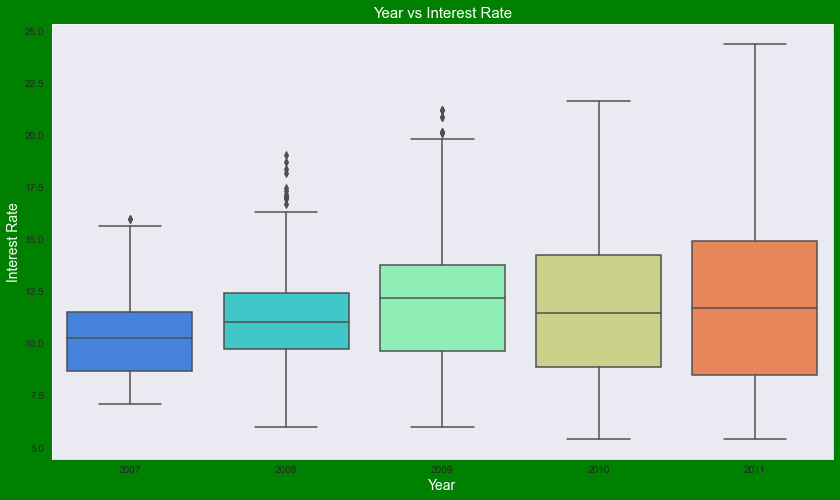

In [1004]:
plt.figure(figsize=(14,8),facecolor='g')

ax = sns.boxplot(y='int_rate', x='year', data =loan_data,palette='rainbow')

ax.set_title('Year vs Interest Rate',fontsize=15,color='w')

ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')

plt.show()

### Observation:
1. Interest rate is increasing slowly with increase in year.